# Energy Appliance Prediction

# * Goal

The goal of this project is to make a prediction model which will predict the enery consumption by the appliances based on the given dataset.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection , metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Energy_Appliance_prediction.xlsx")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
data.shape

(19735, 29)

In [5]:
data.info()#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [6]:
#find out how many null Values in dataset
data.isnull().sum().sort_values(ascending= True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [7]:
# divide the dataset into train and test 
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size= 0.25, random_state= 40)

In [8]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422977,755.561311,79.744066,4.057009,38.345054,3.768330,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.305396,7.398129,14.952250,2.449080,11.785900,4.189998,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933000,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.930000,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.400000,760.966667,91.666667,5.500000,40.000000,6.570000,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.000000,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [9]:
data.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [10]:
#convert the columns into types
col_temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

col_hum = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

col_weather = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [11]:
#make seperate dependent & independent variables
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]

target_vars = train[col_target]

In [12]:
train

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9544,2016-03-17 23:40:00,70,20,22.600,34.700000,19.500000,37.863333,21.500000,35.345000,22.890000,...,19.890000,37.260000,2.230,764.200000,87.666667,1.333333,61.000000,0.40,43.195492,43.195492
19366,2016-05-25 04:40:00,50,0,23.700,40.290000,21.000000,42.900000,25.390000,40.000000,23.600000,...,22.600000,44.590000,6.270,757.233333,93.666667,1.000000,25.333333,5.30,46.369677,46.369677
10816,2016-03-26 19:40:00,100,20,22.200,45.800000,20.463333,44.930000,23.000000,38.560000,20.390000,...,19.963333,41.363333,13.400,750.133333,66.333333,6.333333,40.000000,7.13,25.722968,25.722968
15457,2016-04-28 01:10:00,40,0,21.290,35.790000,18.230000,37.863333,21.290000,34.790000,20.533333,...,18.890000,35.863333,0.317,755.216667,94.333333,2.000000,20.166667,-0.45,3.791656,3.791656
2956,2016-02-01 05:40:00,50,10,21.290,47.400000,20.290000,47.290000,21.666667,46.760000,18.790000,...,17.600000,52.900000,10.800,758.666667,92.666667,6.666667,59.000000,9.63,8.706206,8.706206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,2016-03-31 19:00:00,100,0,21.760,41.933333,20.000000,43.163333,22.000000,38.466667,20.600000,...,20.000000,38.863333,8.100,754.800000,82.000000,2.000000,40.000000,5.20,36.275509,36.275509
16065,2016-05-02 06:30:00,80,0,21.200,36.433333,18.000000,40.200000,22.100000,35.090000,20.260000,...,19.600000,39.480000,1.750,764.700000,92.500000,1.000000,27.500000,0.65,37.879262,37.879262
14501,2016-04-21 09:50:00,50,0,21.600,37.466667,22.200000,35.700000,22.700000,35.700000,22.390000,...,20.290000,37.900000,9.970,762.616667,67.500000,4.000000,27.166667,4.10,22.496162,22.496162
14555,2016-04-21 18:50:00,120,0,23.175,37.722500,22.856667,35.560000,23.290000,36.590000,22.890000,...,20.200000,36.363333,17.400,759.633333,47.500000,4.000000,38.166667,5.92,32.362623,32.362623


In [13]:
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [14]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [15]:
feature_vars

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9544,22.600,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,...,37.260000,2.230,0.40,87.666667,764.200000,1.333333,61.000000,20,43.195492,43.195492
19366,23.700,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,...,44.590000,6.270,5.30,93.666667,757.233333,1.000000,25.333333,0,46.369677,46.369677
10816,22.200,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,...,41.363333,13.400,7.13,66.333333,750.133333,6.333333,40.000000,20,25.722968,25.722968
15457,21.290,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,...,35.863333,0.317,-0.45,94.333333,755.216667,2.000000,20.166667,0,3.791656,3.791656
2956,21.290,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,...,52.900000,10.800,9.63,92.666667,758.666667,6.666667,59.000000,10,8.706206,8.706206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,8.226667,20.200000,24.463333,20.000000,41.933333,...,38.863333,8.100,5.20,82.000000,754.800000,2.000000,40.000000,0,36.275509,36.275509
16065,21.200,18.000000,22.100000,20.260000,19.600000,1.730000,19.290000,22.290000,19.600000,36.433333,...,39.480000,1.750,0.65,92.500000,764.700000,1.000000,27.500000,0,37.879262,37.879262
14501,21.600,22.200000,22.700000,22.390000,20.000000,13.066667,21.290000,21.500000,20.290000,37.466667,...,37.900000,9.970,4.10,67.500000,762.616667,4.000000,27.166667,0,22.496162,22.496162
14555,23.175,22.856667,23.290000,22.890000,21.166667,18.600000,22.238571,22.823333,20.200000,37.722500,...,36.363333,17.400,5.92,47.500000,759.633333,4.000000,38.166667,0,32.362623,32.362623


In [16]:
# Due to lot of zero entries this columns is of not much use and will be drop in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True)


In [17]:
feature_vars.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2',
       'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out',
       'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1',
       'rv2'],
      dtype='object')

In [18]:
#convert weekday's into o and 1 (for weekday is 0 and 1 is weekend)
data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 ==1).astype(float)
data['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

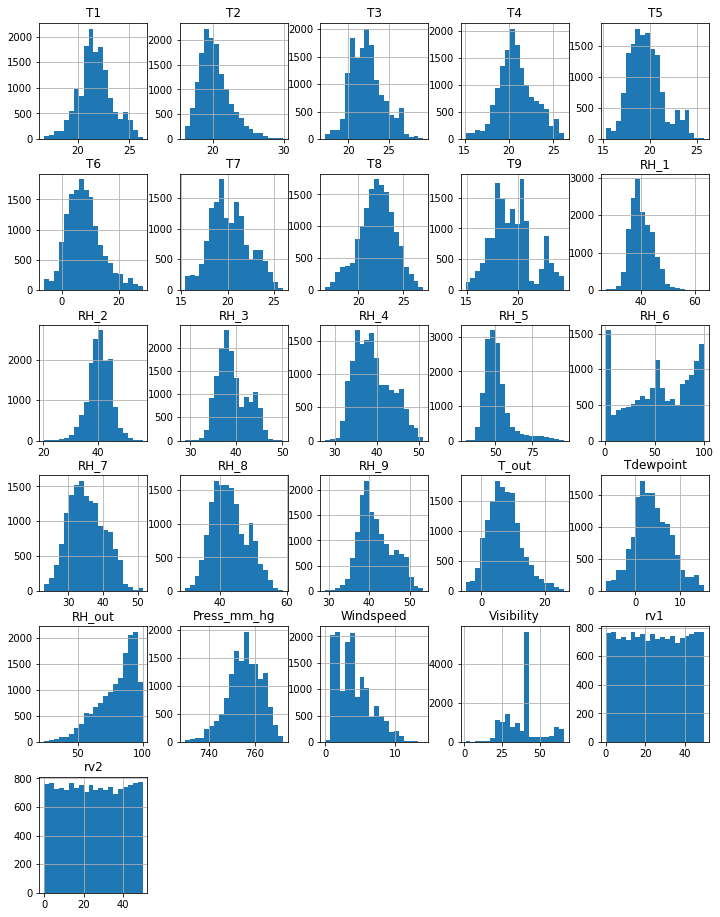

In [19]:
feature_vars.hist(bins=20, figsize= (12,16));

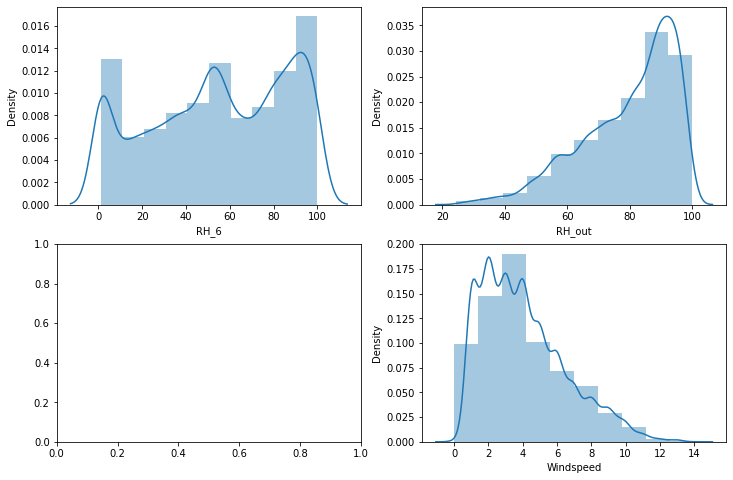

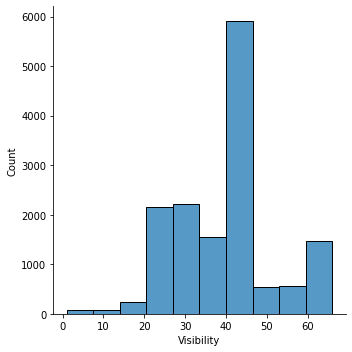

In [20]:
f, ax = plt.subplots(2,2, figsize= (12,8))
vis1 = sns.distplot(feature_vars["RH_6"], bins= 10, ax=ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"], bins= 10, ax= ax[0][1])
vis3 = sns.displot(feature_vars["Visibility"], bins=10, ax= ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"], bins= 10, ax= ax[1][1])

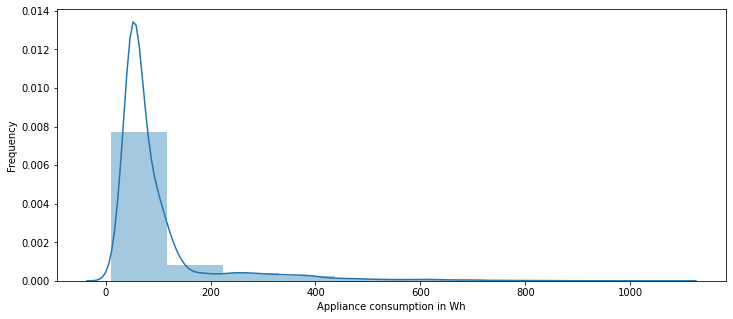

In [21]:
f = plt.figure(figsize= (12,5))
plt.ylabel('Frequency')
plt.xlabel("Appliance consumption in Wh")
sns.distplot(target_vars, bins= 10);

# Observations
* Temperature - All the columns follow normal distribution except T9
* Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the  *   house
* Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column
* Visibilty - This column is negatively skewed
* Windspeed - This column is postively skewed


In [22]:
print("Percentage of the appliance consumption is less than 200 Wh")
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100)

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


In [23]:
target_vars.count()

Appliances    14801
dtype: int64

In [24]:
len(target_vars)

14801

# Correlation Matrix

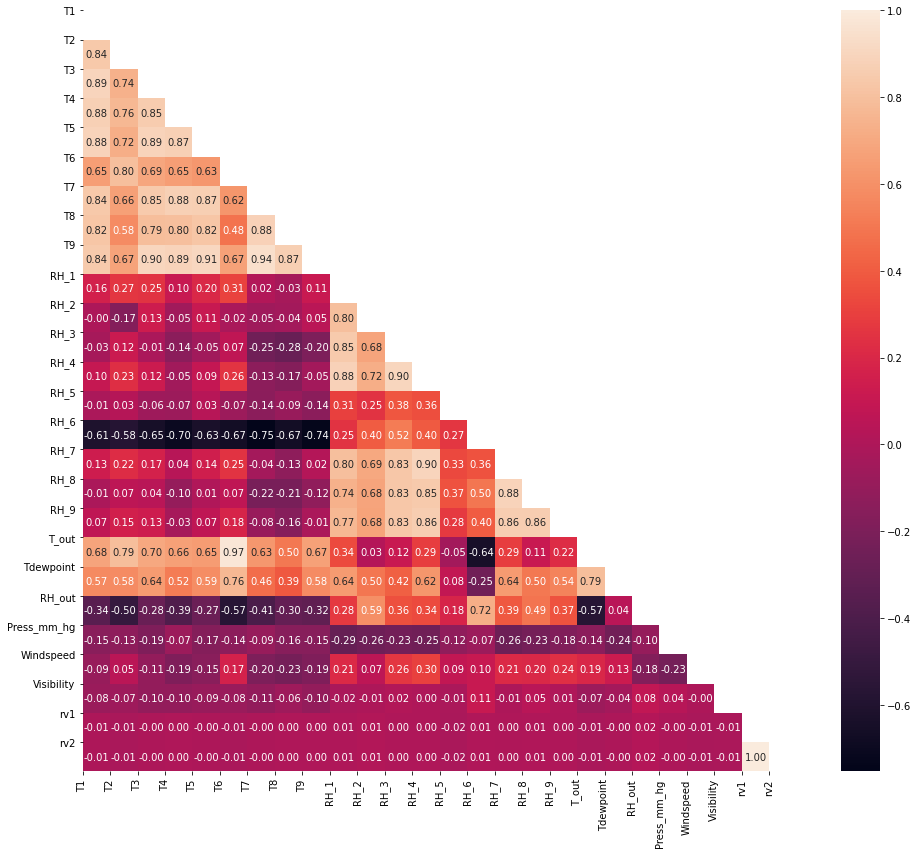

In [25]:
#Use the weather, Temperature, Appliance, Random column to see correlation
train_corr = train[col_temp + col_hum + col_weather + col_randoms]
corr = train_corr.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr, annot= True, fmt= ".2f", mask= mask)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [26]:
corr

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
T1,1.000000,0.835729,0.892292,0.876682,0.884692,0.654018,0.837079,0.824657,0.842862,0.162541,...,-0.008993,0.069972,0.681387,0.568739,-0.343981,-0.146258,-0.091633,-0.075986,-0.005535,-0.005535
T2,0.835729,1.000000,0.735308,0.761728,0.719213,0.801219,0.660636,0.576362,0.673018,0.266640,...,0.066276,0.154684,0.791551,0.579592,-0.504582,-0.128098,0.050390,-0.067481,-0.014736,-0.014736
T3,0.892292,0.735308,1.000000,0.851790,0.887545,0.685721,0.846021,0.794213,0.900209,0.251845,...,0.041952,0.132970,0.697182,0.643717,-0.278606,-0.186279,-0.106657,-0.103242,-0.001338,-0.001338
T4,0.876682,0.761728,0.851790,1.000000,0.871733,0.650883,0.876677,0.796458,0.888264,0.103550,...,-0.098930,-0.028902,0.661380,0.516354,-0.386273,-0.071174,-0.190402,-0.103115,0.000255,0.000255
T5,0.884692,0.719213,0.887545,0.871733,1.000000,0.627545,0.869655,0.824057,0.910009,0.202904,...,0.012812,0.069136,0.649032,0.585240,-0.272463,-0.166644,-0.149447,-0.086064,-0.003678,-0.003678
T6,0.654018,0.801219,0.685721,0.650883,0.627545,1.000000,0.616984,0.482269,0.665326,0.312280,...,0.071563,0.181583,0.974673,0.762016,-0.566953,-0.136588,0.168136,-0.076808,-0.014952,-0.014952
T7,0.837079,0.660636,0.846021,0.876677,0.869655,0.616984,1.000000,0.881513,0.943921,0.017160,...,-0.216401,-0.082605,0.628525,0.463068,-0.408364,-0.090470,-0.195561,-0.110241,-0.000216,-0.000216
T8,0.824657,0.576362,0.794213,0.796458,0.824057,0.482269,0.881513,1.000000,0.868251,-0.033167,...,-0.214345,-0.159871,0.502027,0.389571,-0.300291,-0.155747,-0.226356,-0.062398,0.000739,0.000739
T9,0.842862,0.673018,0.900209,0.888264,0.910009,0.665326,0.943921,0.868251,1.000000,0.112264,...,-0.117664,-0.012443,0.665540,0.578859,-0.315490,-0.152335,-0.185855,-0.102838,0.002618,0.002618
RH_1,0.162541,0.266640,0.251845,0.103550,0.202904,0.312280,0.017160,-0.033167,0.112264,1.000000,...,0.737060,0.766100,0.336997,0.639305,0.279360,-0.292440,0.205682,-0.019954,0.005506,0.005506


In [30]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop =set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlation(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(get_top_abs_correlation(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974673
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791551
dtype: float64

# Data Pre Processing

In [32]:
feature_vars.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2',
       'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out',
       'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1',
       'rv2'],
      dtype='object')

In [33]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [34]:
train_X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.60,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.70,...,38.50,37.260000,2.230,0.40,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.70,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.29,...,43.40,44.590000,6.270,5.30,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677
10816,22.20,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.80,...,43.80,41.363333,13.400,7.13,66.333333,750.133333,6.333333,40.000000,25.722968,25.722968
15457,21.29,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.79,...,42.95,35.863333,0.317,-0.45,94.333333,755.216667,2.000000,20.166667,3.791656,3.791656
2956,21.29,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.40,...,57.50,52.900000,10.800,9.63,92.666667,758.666667,6.666667,59.000000,8.706206,8.706206


In [36]:
train_y.head()

,Appliances
9544,70
19366,50
10816,100
15457,40
2956,50


In [37]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [38]:
test_X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
6314,20.600000,19.600000,20.730000,20.290000,18.100000,5.766667,19.405714,20.166667,18.212857,38.826667,...,39.126667,39.712857,6.13,-1.13,60.333333,758.200000,2.000000,33.333333,12.543994,12.543994
12257,23.000000,20.963333,25.166667,21.500000,21.566667,10.225000,22.000000,24.100000,20.790000,42.890000,...,37.790000,39.230000,12.00,5.78,65.500000,752.433333,4.000000,40.000000,19.339154,19.339154
6271,20.323333,18.033333,21.200000,19.790000,18.390000,-2.000000,19.000000,20.200000,18.290000,39.500000,...,45.700000,44.400000,-1.25,-1.63,97.333333,759.966667,1.833333,37.166667,4.929062,4.929062
18179,23.200000,21.390000,24.200000,23.200000,21.700000,9.756000,23.468571,24.790000,22.628571,38.560000,...,39.400000,37.225714,10.60,6.13,75.000000,760.600000,1.000000,40.000000,35.895013,35.895013
9661,21.700000,19.533333,21.463333,20.566667,18.500000,6.300000,19.700000,22.700000,19.600000,37.060000,...,37.590000,36.590000,5.73,3.73,87.500000,762.200000,4.000000,57.833333,40.029029,40.029029


In [39]:
test_y.head()

,Appliances
6314,60
12257,410
6271,30
18179,40
9661,120


In [40]:
train_X.drop(["rv1", "rv2", "Visibility", "T6", "T9"], axis= 1, inplace= True)

In [41]:
test_X.drop(["rv1", "rv2", "Visibility", "T6", "T9"], axis= 1, inplace= True)

In [42]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [43]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

sc_train = pd.DataFrame(columns=train.columns, index= train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test = pd.DataFrame(columns= test.columns, index = test.index)

sc_test[sc_train.columns] = sc.fit_transform(test)

In [46]:
train[list(train_X.columns.values)]

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,22.600,19.500000,21.500000,22.890000,19.166667,21.000000,22.890000,34.700000,37.863333,35.345000,...,71.263333,57.826667,26.890000,38.500000,37.260000,2.230,0.40,87.666667,764.200000,1.333333
19366,23.700,21.000000,25.390000,23.600000,19.890000,23.000000,24.200000,40.290000,42.900000,40.000000,...,37.900000,39.890000,35.090000,43.400000,44.590000,6.270,5.30,93.666667,757.233333,1.000000
10816,22.200,20.463333,23.000000,20.390000,19.856667,20.890000,23.633333,45.800000,44.930000,38.560000,...,50.026667,33.500000,37.000000,43.800000,41.363333,13.400,7.13,66.333333,750.133333,6.333333
15457,21.290,18.230000,21.290000,20.533333,19.290000,19.500000,22.200000,35.790000,37.863333,34.790000,...,59.990000,51.160000,29.700000,42.950000,35.863333,0.317,-0.45,94.333333,755.216667,2.000000
2956,21.290,20.290000,21.666667,18.790000,19.475556,19.044444,20.926667,47.400000,47.290000,46.760000,...,52.175556,99.900000,51.025000,57.500000,52.900000,10.800,9.63,92.666667,758.666667,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,21.760,20.000000,22.000000,20.600000,20.100000,20.200000,24.463333,41.933333,43.163333,38.466667,...,48.500000,56.326667,33.790000,39.693333,38.863333,8.100,5.20,82.000000,754.800000,2.000000
16065,21.200,18.000000,22.100000,20.260000,19.600000,19.290000,22.290000,36.433333,40.200000,35.090000,...,46.290000,40.193333,29.700000,41.566667,39.480000,1.750,0.65,92.500000,764.700000,1.000000
14501,21.600,22.200000,22.700000,22.390000,20.000000,21.290000,21.500000,37.466667,35.700000,35.700000,...,45.433333,6.696667,32.290000,39.200000,37.900000,9.970,4.10,67.500000,762.616667,4.000000
14555,23.175,22.856667,23.290000,22.890000,21.166667,22.238571,22.823333,37.722500,35.560000,36.590000,...,40.333333,1.000000,30.057143,38.433333,36.363333,17.400,5.92,47.500000,759.633333,4.000000


In [47]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978843,-0.803925,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217329,0.365566,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.126631,0.802335,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339432,-1.006796,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.636548,1.399015,0.864287,0.419763,1.065602,-0.464759


In [48]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,...,1.086122,-0.407472,-0.731388,-0.437093,-0.233584,-1.156288,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,...,-1.056634,-0.276865,-0.989635,-0.554766,0.862107,0.484699,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,...,0.869462,0.702690,0.538598,0.705174,-1.611131,-1.275028,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,...,-1.365905,-0.346975,-0.678579,-1.043214,0.600784,0.567817,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,...,0.039148,-1.025548,-1.028276,-1.198139,-0.308248,-0.002135,0.524227,0.917775,0.004891,0.224334


In [51]:
train_X = sc_train.drop(['Appliances'], axis=1)
train_y = sc_train['Appliances']

test_X = sc_test.drop(['Appliances'], axis=1)
test_y = sc_test['Appliances']

In [52]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

In [53]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978843,-0.803925,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217329,0.365566,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.126631,0.802335,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339432,-1.006796,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,0.137914,1.453771,3.043131,2.777725,2.719419,0.636548,1.399015,0.864287,0.419763,1.065602


# Prediction Model Creation
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset -

* Linear Regression : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).
* Random Forest Regression : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.
* Decision Tree Regression : Decision tree builds regression or classification models in the form of a tree structure. It   breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.
* Lasso Regression : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
* Ridge Regression : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.
* XgBoost Regressor : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.
* MLP Regressor : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
* Gradient Boosting Regressor : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
* Support Vector Machine Regressor : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.


Let's deploy the models...

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [55]:
models = [
            ["Lasso :", Lasso()],
            ["Ridge :", Ridge()],
            ["SVR :", SVR(kernel='rbf')],
            ["RandomForest :", RandomForestRegressor()],
            ["ExtraTreesRegressor :", ExtraTreesRegressor()],
            ["GradientBoostingClassifier :", GradientBoostingRegressor()],
            ["XGBRegressor :", xgb.XGBRegressor()],
            ["MLPRegressor: ", MLPRegressor( activation= 'relu', solver= 'adam', learning_rate= 'adaptive', max_iter=1000, learning_rate_init=0.01, alpha= 0.01)]
    
]

In [57]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error


model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X, train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y, curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y, curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y, curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [58]:
model_data

[{'Name': 'Lasso :',
  'Train_Time': 0.22075176239013672,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge :',
  'Train_Time': 0.07267999649047852,
  'Train_R2_Score': 0.13755342927764336,
  'Test_R2_Score': 0.1213920697331885,
  'Test_RMSE_Score': 0.9373408826391877},
 {'Name': 'SVR :',
  'Train_Time': 8.203131198883057,
  'Train_R2_Score': 0.23568398912105148,
  'Test_R2_Score': 0.2099128520371557,
  'Test_RMSE_Score': 0.8888684649389044},
 {'Name': 'RandomForest :',
  'Train_Time': 23.29977250099182,
  'Train_R2_Score': 0.9395184544326682,
  'Test_R2_Score': 0.5575854853283455,
  'Test_RMSE_Score': 0.6651424769714038},
 {'Name': 'ExtraTreesRegressor :',
  'Train_Time': 7.2030930519104,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6333237181707698,
  'Test_RMSE_Score': 0.6055380102266332},
 {'Name': 'GradientBoostingClassifier :',
  'Train_Time': 5.223559617996216,
  'Train_R2_Score': 0.3334864232333882,
  'Test_R2_Score': 0.23239393289181

In [59]:
df = pd.DataFrame(model_data)

In [60]:
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso :,0.220752,0.000000,0.000000,1.000000
1,Ridge :,0.072680,0.137553,0.121392,0.937341
2,SVR :,8.203131,0.235684,0.209913,0.888868
3,RandomForest :,23.299773,0.939518,0.557585,0.665142
4,ExtraTreesRegressor :,7.203093,1.000000,0.633324,0.605538
5,GradientBoostingClassifier :,5.223560,0.333486,0.232394,0.876131
6,XGBRegressor :,1.043756,0.839838,0.448696,0.742499
7,MLPRegressor:,3.464424,0.295916,0.242105,0.870572


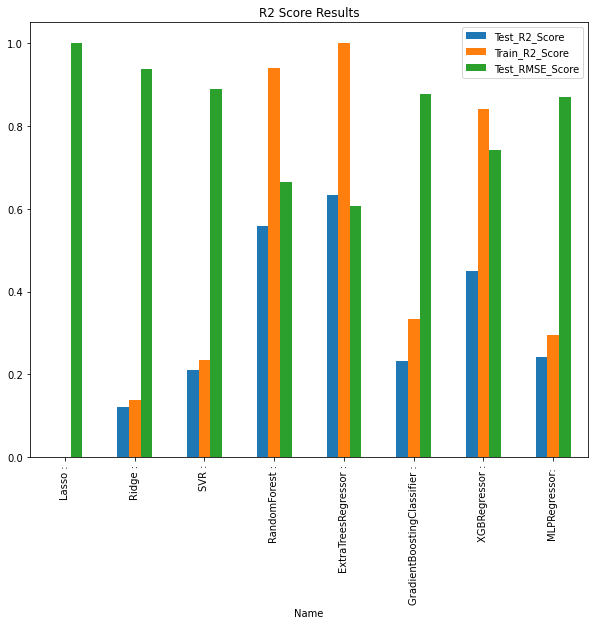

In [63]:
df.plot(x= "Name", y= ["Test_R2_Score", "Train_R2_Score", "Test_RMSE_Score"], kind= 'bar', title= 'R2 Score Results', figsize= (10,8));

# Obervations
1. Best results over test set are given by Extra Tree Regressor with R2 score of 0.57
2. Least RMSE score is also by Extra Tree Regressor 0.65
3. Lasso regularization over Linear regression was worst performing model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = [{
    'max_depth': [80, 150, 200, 250],
    'n_estimators': [100,150,200,250],
    'max_features': ["auto", "sqrt", "log2"]
}]

In [67]:
reg = ExtraTreesRegressor(random_state=40)

In [70]:
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = "r2",  verbose = 2)

In [71]:
grid_search

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [75]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [76]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [77]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [78]:
grid_search.best_estimator_.score(train_X, train_y)

1.0

In [79]:
grid_search.best_estimator_.score(test_X,test_y)

0.6374858998464288

In [80]:
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6020914383659439

In [81]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [82]:
feature_indices

array([ 0,  4, 20,  5,  3, 10, 17, 15, 16, 11, 12,  6,  8, 13,  1, 19,  9,
        2,  7, 18, 14], dtype=int64)

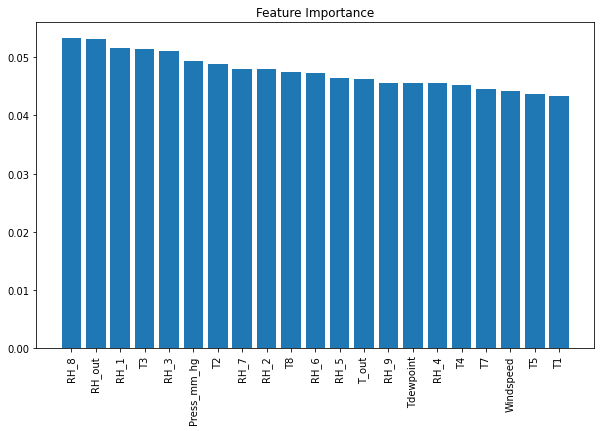

In [83]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
plt.figure(figsize=(10,6))

plt.title('Feature Importance')

plt.bar(range(train_X.shape[1]), importances[indices])

plt.xticks(range(train_X.shape[1]), names, rotation=90)

plt.show()

In [84]:
names[0:5]

['RH_8', 'RH_out', 'RH_1', 'T3', 'RH_3']

In [85]:
names[-5:]

['T4', 'T7', 'Windspeed', 'T5', 'T1']

In [86]:
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [87]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature, train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [89]:
print('Training set R2 Score - ', metrics.r2_score(train_y, cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y, cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999837366892088
Testing set R2 Score -  0.47521135295178285
Testing set RMSE Score -  0.7244229752349225


# Conclusion
1. The best Algorithm to use for this dataset Extra Trees Regressor

2. The untuned model was able to explain 57% of variance on test set .

3. The tuned model was able to explain 63% of varaince on tese set which is improvement of 10%

4. The final model had 22 features

5. Feature reduction was not able to add to better R2 score

 

# END